## Principal Component Analysis (PCA) using eigenvalue decomposition
Performing eigenvalue decompositon on a generated two-dimensional data that follows a multivariate Gaussian distribution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate some random Gaussian distributed data
np.random.seed(0)
mu = np.array([0, 0])
cov = np.array([[5, 3], [3, 4]])
n_samples = 1000
data = np.random.multivariate_normal(mu, cov, n_samples)

print("shape mu:", mu.shape)
print("shape cov:", cov.shape)
print("shape data:", data.shape)


shape mu: (2,)
shape cov: (2, 2)
shape data: (1000, 2)


### 4.1 Visualize the data
Visualize the data in a scatterplot, which shows a dot for every data-point. Feel free to continue using the bee example, where every data-point is a bee which is at a particular ($x$, $y$) location. Again, make sure to annotate your figure as much as possible (i.e., add labels etc.).

Additionally, plot the covariance matrix as an image in a separate figure. Add a colorbar to the image. In this image you should be able to see the variance and covariance of the variables.

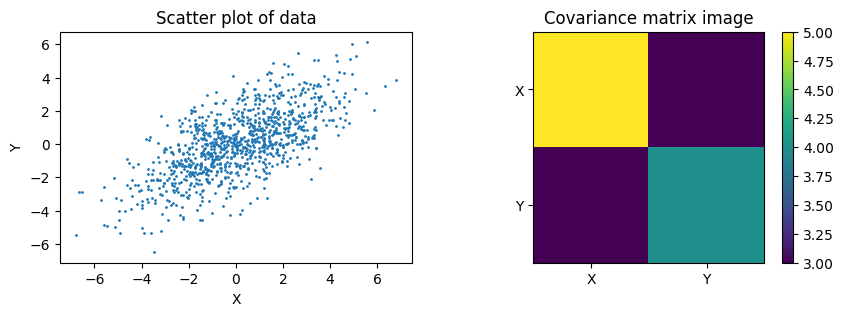

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].scatter(data[:, 0], data[:, 1],s=1)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Scatter plot of data')
im = ax[1].imshow(cov)
ax[1].set_xticks(range(2),['X', 'Y'])
ax[1].set_yticks(range(2),['X', 'Y'])
fig.colorbar(im)
ax[1].set_title('Covariance matrix image')
plt.show()

#### Eigenvalue calculatoin

In [8]:
# Perform eigenvalue decomposition on the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov)
print("Eigenvalues shape:", eig_vals.shape)
print("Eigenvectors shape:", eig_vecs.shape)


Eigenvalues shape: (2,)
Eigenvectors shape: (2, 2)


#### Rotating the data

Shape of rotated data: (1000, 2)
Shape of new covariance matrix: (2, 2)
Rotated data eigvalue shape: (2,)
Rotated data eigvecs shape: (2, 2)


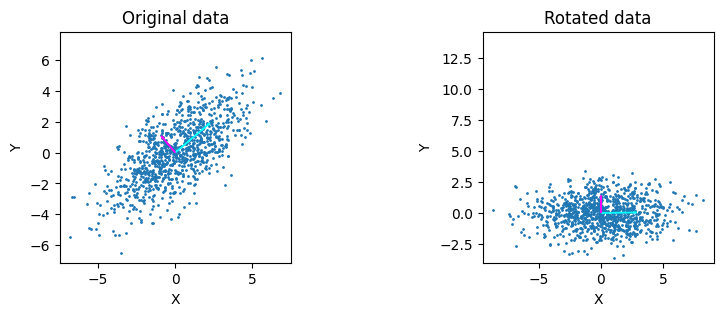

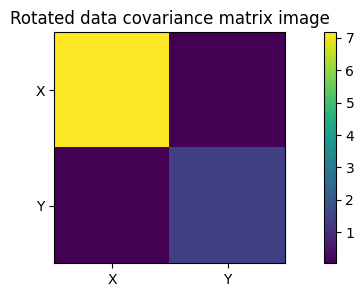

In [9]:
# Rotate data using eigenvectors
rotated_data = np.dot(data, eig_vecs)
print('Shape of rotated data:', rotated_data.shape)

# Compute covariance matrix of rotated data
cov_rotated = np.cov(rotated_data, rowvar=False)
print('Shape of new covariance matrix:', cov_rotated.shape)

# # Compute eigenvalue decomposition of rotated data
eig_vals_rotated, eig_vecs_rotated = np.linalg.eig(cov_rotated)
print('Rotated data eigvalue shape:', eig_vals_rotated.shape)
print('Rotated data eigvecs shape:', eig_vecs_rotated.shape)

# Visualize scatter plot of rotated data
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].scatter(data[:, 0], data[:, 1],s=1)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Original data')
ax[0].arrow(0, 0, np.sqrt(eig_vals[0]) * eig_vecs[0, 0], np.sqrt(eig_vals[0]) * eig_vecs[1, 0],
         head_width=0.1, head_length=0.2, fc='cyan', ec='cyan')
ax[0].arrow(0, 0, np.sqrt(eig_vals[1]) * eig_vecs[0, 1], np.sqrt(eig_vals[1]) * eig_vecs[1, 1],
         head_width=0.1, head_length=0.2, fc='magenta', ec='magenta')
ax[0].axis('square')
# rotated data
ax[1].scatter(rotated_data[:, 0], rotated_data[:, 1],s=1)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Rotated data')
ax[1].arrow(0, 0, np.sqrt(eig_vals_rotated[0]) * eig_vecs_rotated[0, 0], np.sqrt(eig_vals_rotated[0]) * eig_vecs_rotated[1, 0],
         head_width=0.1, head_length=0.2, fc='cyan', ec='cyan')
ax[1].arrow(0, 0, np.sqrt(eig_vals_rotated[1]) * eig_vecs_rotated[0, 1], np.sqrt(eig_vals_rotated[1]) * eig_vecs_rotated[1, 1],
         head_width=0.1, head_length=0.2, fc='magenta', ec='magenta')
ax[1].axis('square')

#covariance matrix image
plt.figure(figsize=(10,3))
im = plt.imshow(cov_rotated)
plt.colorbar(im)
plt.xticks(range(2),['X', 'Y'])
plt.yticks(range(2),['X', 'Y'])
plt.title('Rotated data covariance matrix image')
plt.show()